In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm  as cm

----------

In [57]:
n_file = 1
file_path = f'../../data/Nyles/plume_ref4/plume_ref4_{n_file:02d}_hist.nc'

In [58]:
path

'../../data/Nyles/plume_ref4/plume_ref4_03_hist.nc'

In [84]:
field = {}
grid = {}

for i in range(0,4):
    path = f'../../data/Nyles/plume_ref4/plume_ref4_{i:02d}_hist.nc'
    print(path)
    with Dataset(path, 'r') as nc:
        field[f'b_{i:01d}'] = nc['b'][:].data
        grid[f'x_{i:01d}'] = nc['x'][:].data
        grid[f'y_{i:01d}'] = nc['y'][:].data

../../data/Nyles/plume_ref4/plume_ref4_00_hist.nc
../../data/Nyles/plume_ref4/plume_ref4_01_hist.nc
../../data/Nyles/plume_ref4/plume_ref4_02_hist.nc
../../data/Nyles/plume_ref4/plume_ref4_03_hist.nc


In [85]:
field['b_0'].shape

(145, 16, 16, 16)

In [86]:
x = y = np.linspace(0, 4000, 32)

In [87]:
d = np.sqrt(x**2 + y**2)
r0 = 0.01 # <= radius of the heat source (domain horizontal extent is 100 r0)
msk = 0.5*(1- np.tanh(d/r0))

nudging = lambda x: 0.5*(1-np.tanh(x/r0))

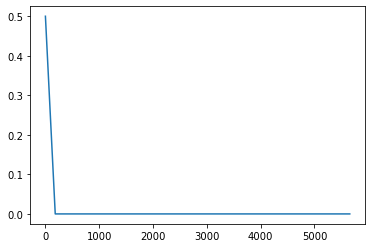

In [88]:
plt.plot(d, msk)

In order to orient myself I plot the different domains.

In [ ]:
import numpy.ma as ma

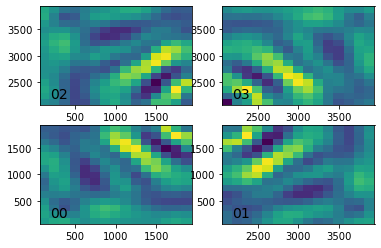

In [91]:
t = 140
x0 = 2000
y0 = 2000
for i in range(0, 4):
    k = (i+2)%4 + 1
    
    ax = plt.subplot(2,2,k)
    XX, YY = np.meshgrid(grid[f'x_{i}'], grid[f'y_{i}'])
    ax.pcolormesh(XX, YY, field[f'b_{i}'][t, 8, :, :])
    ax.text(XX[1,1],YY[1,1], f'{i:02d}', size=14)

Using a mask to chop the nudging

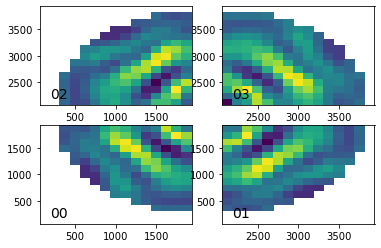

In [94]:
t = 140
x0 = 2000
y0 = 2000
for i in range(0, 4):
    k = (i+2)%4 + 1
    
    b = field[f'b_{i}'][t, 8, :, :]
    
    ax = plt.subplot(2,2,k)
    XX, YY = np.meshgrid(grid[f'x_{i}'], grid[f'y_{i}'])
    d = np.sqrt((XX - x0)**2 + (YY - y0)**2)
    mask = ma.masked_outside(d, 0, 1800)
    
    b_new = ma.masked_array(b, mask.mask)
    ax.pcolormesh(XX, YY, b_new)#field[f'b_{i}'][t, 8, :, :])
    ax.text(XX[1,1],YY[1,1], f'{i:02d}', size=14)

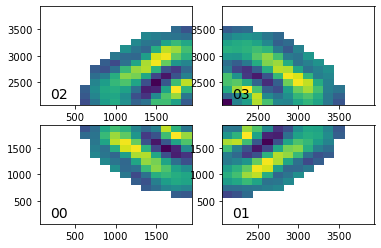

In [96]:
t = 140
x0 = 2000
y0 = 2000
for i in range(0, 4):
    k = (i+2)%4 + 1
    
    b = field[f'b_{i}'][t, 8, :, :]
    
    ax = plt.subplot(2,2,k)
    XX, YY = np.meshgrid(grid[f'x_{i}'], grid[f'y_{i}'])
    d = np.sqrt((XX - x0)**2 + (YY - y0)**2)
    mask = ma.masked_outside(d, 0, 1500)
    
    b_new = ma.masked_array(b, mask.mask)
    ax.pcolormesh(XX, YY, b_new)#field[f'b_{i}'][t, 8, :, :])
    ax.text(XX[1,1],YY[1,1], f'{i:02d}', size=14)
    

# horizontal mean for the whole domain

In [ ]:
t = 140
x0 = 2000
y0 = 2000
n_levels = 16
r_max = 1700

means = np.zeros((n_levels))

for level in range(n_levels):
    #level = 6

    mean_level = 0
    for i in range(0, 4):
       
        b = field[f'b_{i}'][t, level, :, :]
        k = (i+2)%4 + 1

        #ax = plt.subplot(2,2,k)
        XX, YY = np.meshgrid(grid[f'x_{i}'], grid[f'y_{i}'])
        r = np.sqrt((XX - x0)**2 + (YY - y0)**2)
        mask = ma.masked_outside(r, 0, r_max)
        b_new = ma.masked_array(b, mask.mask)
        mean_level += b_new.mean()

        #print(i, b.mean(), b_new.mean())
        #ax.pcolormesh(XX, YY, b_new)#field[f'b_{i}'][t, 8, :, :])
        #ax.text(XX[1,1],YY[1,1], i, size=14)

    means[level] = mean_level/4

plt.plot(means, range(16))

## for a 4D array in subdomains

obj: wrap this in a function

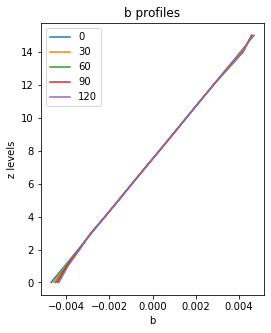

In [121]:
var = 'b'
t = 140
x0 = 2000 # center point in the x domain
y0 = 2000 # center point in the y domain
n_levels = 16 
n_time = 145
r_max = 1700
means = np.zeros((n_time, n_levels))

for i in range(0, 4):
    path = f'../../data/Nyles/plume_ref4/plume_ref4_{i:02d}_hist.nc'
    
    with Dataset(path, 'r') as nc:
        field = nc[var][:].data
        x = nc['x'][:].data
        y = nc['y'][:].data
        
    XX, YY = np.meshgrid(x, y)
    r = np.sqrt((XX - x0)**2 + (YY - y0)**2)
    mask = ma.masked_outside(r, 0, r_max)

    for t in range(n_time):
        for level in range(n_levels):
            
            field_new = ma.masked_array(field[t, level, :, :], mask.mask)
            means[t, level] += field_new.mean()

means = means/4

plt.figure(figsize=(4,5))
for t in range(0, 145, 30):
    plt.plot(means[t, :], range(16), label=t)
    

plt.xlabel('b')
plt.ylabel('z levels')
plt.title(var + ' profiles')
plt.legend()

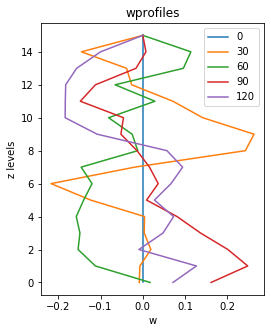

In [123]:
var = 'w'
t = 140
x0 = 2000 # center point in the x domain
y0 = 2000 # center point in the y domain
n_levels = 16 
n_time = 145
r_max = 1700
means = np.zeros((n_time, n_levels))

for i in range(0, 4):
    path = f'../../data/Nyles/plume_ref4/plume_ref4_{i:02d}_hist.nc'
    
    with Dataset(path, 'r') as nc:
        field = nc[var][:].data
        x = nc['x'][:].data
        y = nc['y'][:].data
        
    XX, YY = np.meshgrid(x, y)
    r = np.sqrt((XX - x0)**2 + (YY - y0)**2)
    mask = ma.masked_outside(r, 0, r_max)

    for t in range(n_time):
        for level in range(n_levels):
            
            field_new = ma.masked_array(field[t, level, :, :], mask.mask)
            means[t, level] += field_new.mean()

means = means/4

plt.figure(figsize=(4,5))
for t in range(0, 145, 30):
    plt.plot(means[t, :], range(16), label=t)
    

plt.xlabel(var)
plt.ylabel('z levels')
plt.title( var + 'profiles')
plt.legend()

Small test: I average an array of ones

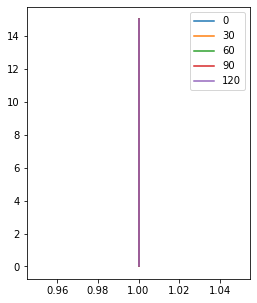

In [113]:
var = 'b'
t = 140
x0 = 2000 # center point in the x domain
y0 = 2000 # center point in the y domain
n_levels = 16 
n_time = 145
r_max = 1700
means = np.zeros((n_time, n_levels))

for i in range(0, 4):
    path = f'../../data/Nyles/plume_ref4/plume_ref4_{i:02d}_hist.nc'
    
    with Dataset(path, 'r') as nc:
        field = nc[var][:].data
        x = nc['x'][:].data
        y = nc['y'][:].data
        
    XX, YY = np.meshgrid(x, y)
    r = np.sqrt((XX - x0)**2 + (YY - y0)**2)
    mask = ma.masked_outside(r, 0, r_max)

    for t in range(n_time):
        for level in range(n_levels):
            
            test_field = np.ones_like(r)
            field_new = ma.masked_array(test_field, mask.mask)
            means[t, level] += field_new.mean()

means = means/4

plt.figure(figsize=(4,5))
for t in range(0, 145, 30):
    plt.plot(means[t, :], range(16), label=t)
    
plt.legend()

seems to work

TO DO:
-  Algorithm to take averages without merging subdomains
- function to compute offline variables, like $N^2$, vorticity, kinetic and potential energy, etc.

Let's simulate a finer resolution with multiple subdomains. To save time I will create a fake simulation, to test this ideas.

In [38]:
2**7

128

In [45]:
x = y = np.linspace(0, 4000, 2**7)
z = np.linspace(0,2000, 2**6)

field = np.zeros((10, z.shape[0], x.shape[0], y.shape[0]))

In [54]:
N = 4
doamin_size = 32
for i in range(4):
    
    i_beg = 0 + 32*i
    i_end = 32 + 32*i
    morceaux = slice(i_beg, i_end)
    f = field[:, :,morceaux, morceaux]

In [52]:
field[:,:, slice(0, 32), slice(0, 32)].shape

(10, 64, 32, 32)

In [42]:
x[slice(0,16)]

array([  0.        ,  31.49606299,  62.99212598,  94.48818898,
       125.98425197, 157.48031496, 188.97637795, 220.47244094,
       251.96850394, 283.46456693, 314.96062992, 346.45669291,
       377.95275591, 409.4488189 , 440.94488189, 472.44094488])

In [ ]:
x[slice(0,16)]